<a href="https://colab.research.google.com/github/PrestoshTJ/ML-Projects/blob/main/Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install torch torchvision matplotlib

In [12]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch as torch
import matplotlib.pyplot as plt

In [5]:
train_data = datasets.MNIST(root = 'data', train = True, transform = ToTensor(), download = True)
test_data = datasets.MNIST(root = 'data', train = False, transform = ToTensor(), download = True)

In [6]:
data_loaders = {
    'train': DataLoader(train_data, batch_size = 100, shuffle = True, num_workers = 1),
    'test': DataLoader(test_data, batch_size = 100, shuffle = True, num_workers = 1)
}

In [7]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10,20,kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320,50)
    self.fc2 = nn.Linear(50,10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training = self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()
def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(data_loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"Train epoch: {epoch} [{batch_idx * len(data)}/{len(data_loaders['train'].dataset)} ({100. * batch_idx / len(data_loaders['train']):.0f}%)]\t{loss.item():.6f}")

def test():
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in data_loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(data_loaders['test'].dataset)
  print(f"\nTest set: Average loss: {test_loss: .4f}, Accuracy {correct}/{len(data_loaders['test'].dataset)} ({100. * correct / len(data_loaders['test'].dataset):.0f}%\n)")


In [9]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-7-da121ee6bd6c>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train epoch: 1 [0/60000 (0%)]	2.301740
Train epoch: 1 [2000/60000 (3%)]	2.286477
Train epoch: 1 [4000/60000 (7%)]	2.206698
Train epoch: 1 [6000/60000 (10%)]	2.028576
Train epoch: 1 [8000/60000 (13%)]	1.926877
Train epoch: 1 [10000/60000 (17%)]	1.851065
Train epoch: 1 [12000/60000 (20%)]	1.839232
Train epoch: 1 [14000/60000 (23%)]	1.774469
Train epoch: 1 [16000/60000 (27%)]	1.784766
Train epoch: 1 [18000/60000 (30%)]	1.807272
Train epoch: 1 [20000/60000 (33%)]	1.733592
Train epoch: 1 [22000/60000 (37%)]	1.732880
Train epoch: 1 [24000/60000 (40%)]	1.734069
Train epoch: 1 [26000/60000 (43%)]	1.654275
Train epoch: 1 [28000/60000 (47%)]	1.716706
Train epoch: 1 [30000/60000 (50%)]	1.756044
Train epoch: 1 [32000/60000 (53%)]	1.726544
Train epoch: 1 [34000/60000 (57%)]	1.703051
Train epoch: 1 [36000/60000 (60%)]	1.652337
Train epoch: 1 [38000/60000 (63%)]	1.754558
Train epoch: 1 [40000/60000 (67%)]	1.727388
Train epoch: 1 [42000/60000 (70%)]	1.647361
Train epoch: 1 [44000/60000 (73%)]	1.650974

<ipython-input-7-da121ee6bd6c>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


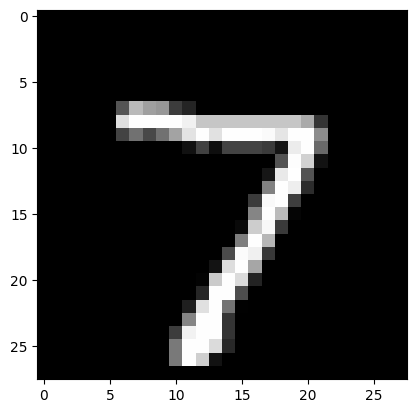

In [13]:
model.eval()
data, target = test_data[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True).item()
print(f"Prediction: {prediction}")
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap = "gray")
plt.show()

In [14]:
test()

<ipython-input-7-da121ee6bd6c>:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)



Test set: Average loss:  0.0149, Accuracy 9727/10000 (97%
)
